In [6]:
import pandas as pd
# spreadsheet-organizes data
import numpy as np
# Can do complex calcukations
import matplotlib.pyplot as plt
# to draw graphs in the code
import tensorflow as tf
# training the machine

from tensorflow import keras
from tensorflow.keras import layers

# Importing Libraries:

# pandas (pd): This is like a tool that helps you organize and analyze data. It's like a spreadsheet where you can store information about fruits, their colors, sizes, etc.
# NumPy (np): This is another tool for working with numbers. It's like a calculator that can do complex calculations very quickly.
# Matplotlib.pyplot (plt): This is a tool for drawing graphs and charts. It's like a paintbrush that helps you visualize the data.
# TensorFlow (tf): This is a powerful library for building and training machine learning models. It's like the brain of your robot, helping it learn from the data.

# what does this code do?
# Imports necessary libraries.
# Defines a simple neural network model:
# Takes input data.
# Processes it through layers.
# Produces an output.
# This model can be used for various tasks, such as:
# Predicting numerical values (e.g., house prices)
# Classifying data (e.g., identifying fruits)
# Generating text or images


In [7]:
data_train_path = 'train' #train is the path to the dataset
data_test_path = 'test'
data_val_path = 'validation'

In [8]:
img_width = 700
img_height = 700

#the images can be of different sizes therefore we have to convert it similar sizes

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,

    # Ensures that the dataset is shuffled before being split into batches. 
    # This is important for training neural networks as it prevents the model from learning patterns in the order of the data
    #  (e.g., all images of one class appearing together).
    image_size=(img_width,img_height),
    batch_size=32,
    # Batch size affects training speed and memory usage:
    # Smaller batch size: Uses less memory but may require more iterations.
    # Larger batch size: Uses more memory but trains faster per epoch.
    validation_split=False)
    #validation split splits the data for validation also, but since we already created validation folder we will make it false

Found 266 files belonging to 8 classes.


In [12]:
data_cat=data_train.class_names
# here we assigned all the weed names to data_val variable
# The list is a python list

In [23]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 470 files belonging to 8 classes.


In [24]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 470 files belonging to 8 classes.


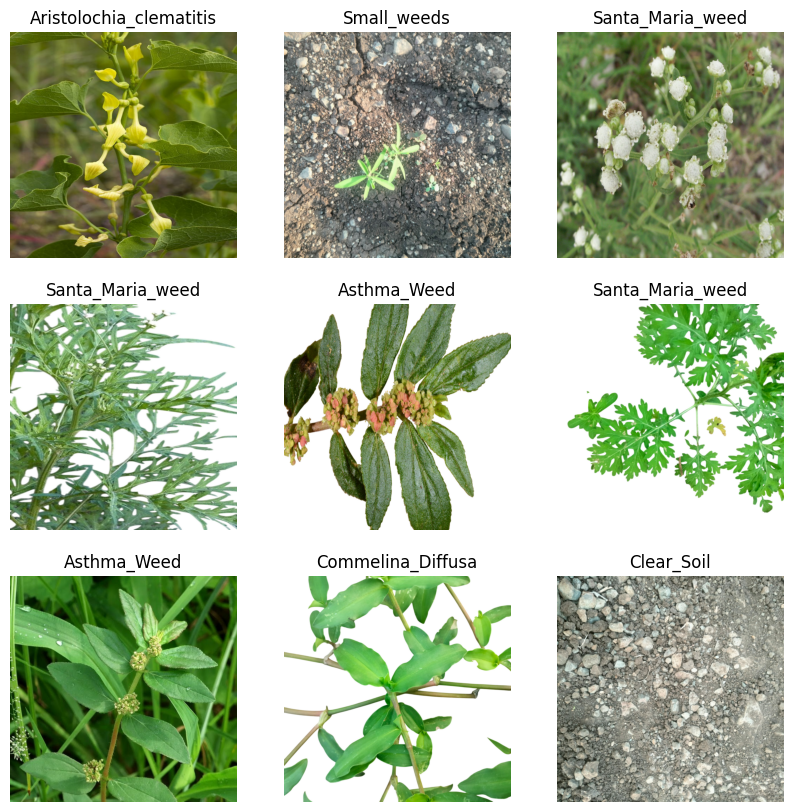

In [16]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [26]:
import os

In [27]:
# Replace this with the path where your folders are stored
folder_path = "train"

# Get a list of folder names (classes)
weed_classes = sorted(os.listdir(folder_path))

# Create labels.txt
with open("labels.txt", "w") as file:
    for idx, weed in enumerate(weed_classes):
        file.write(f"{idx} {weed}\n")

print("labels.txt has been created!")

labels.txt has been created!


In [28]:
from tensorflow.keras.models import Sequential

In [29]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 700, 700, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
model  = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat))
])

In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
epochs = 19
history = model.fit(data_train, validation_data=data_val, epochs=epochs,batch_size=32,verbose=1)

Epoch 1/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.1565 - loss: 39.6714 - val_accuracy: 0.2277 - val_loss: 3.5334
Epoch 2/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 94s 11s/step - accuracy: 0.2736 - loss: 3.2303 - val_accuracy: 0.2191 - val_loss: 2.1188
Epoch 3/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.2625 - loss: 1.7901 - val_accuracy: 0.4191 - val_loss: 1.6843
Epoch 4/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 122s 14s/step - accuracy: 0.6645 - loss: 1.2766 - val_accuracy: 0.5468 - val_loss: 1.6106
Epoch 5/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 158s 18s/step - accuracy: 0.8325 - loss: 0.6298 - val_accuracy: 0.5979 - val_loss: 1.8571
Epoch 6/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 137s 17s/step - accuracy: 0.8936 - loss: 0.2609 - val_accuracy: 0.5468 - val_loss: 3.3551
Epoch 7/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.9505 - loss: 0.1900 - val_accuracy: 0.5660 - val_loss: 3.5164
Epoch 8/19
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9877 - loss: 0.0844 - val_accuracy: 0.6170 - val_loss: 2.9413


In [34]:
import tensorflow as tf

In [47]:
image='test5.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))  # Now 'tf' is defined and can be used
img_arr = tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr, axis=0)

In [48]:
predict= model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [49]:
score = tf.nn.softmax(predict[0])

In [51]:
print('It is an image of {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

It is an image of Small_weeds with accuracy of 99.19


In [52]:
model.save( 'Image_classification.keras')